**21-03-26 자연어처리 02_한글 형태소 분석 (c)cherryuki (ji)**

# Ch02. 한글 형태소 분석
## 1. 자연어 처리
- 자연어(사람들이 일상적으로 사용하는 언어, NLP) 처리
- 자연어 처리 분야
  - 자연어 이해: 형태소 분석 -> 의미 분석 -> 대화 분석
  - 자연어 생성: 대화 분석 -> 다음 문장이나 단어 출력
- 활용 분야: 맞춤법 검사, 번역기, 검색 엔진, 키워드 분석 등

## 2. 자연어 처리 절차
- 전처리: 단어, 어절 추출
- 분석 후보 생성: 형태소(의미를 가진 최소 단위) 분리, 원형 복원, 품사 태깅
- 제약조건(불용어 처리) 규칙 확인
- 분석

## 3. 한글 형태소 분석 엔진
- KoNLPy: 파이썬용 자연어 처리기(JPype1 패키지 의존)
  - https://konlpy.org/en/latest/
  - https://pypi.org/project/JPype1/#files (JPype1-1.2.1-cp38-cp38-win_amd64.whl)
  - KOMORAN: 자바로 만든 형태소 분석기(JAVA_HOME 시스템 변수)
    - https://shineware.tistory.com/entry/KOMORAN-ver-24
  - HanNanum: 자바로 만든 형태소 분석기(JAVA_HOME 시스템 변수)
    - http://semanticweb.kaist.ac.kr/home/index.php/HanNanum
  - Kkma: 서울대학교 연구실
    - http://kkma.snu.ac.kr/documents/index.jsp
- KoNLP: R용 자연어 처리기
  - https://github.com/haven-jeon/KoNLP

In [1]:
#아나콘다에서 pip install JPype1
#다운로드 안될 경우 !pip install JPype1-1.2.1-cp38-cp38-win_amd64.whl
#KoNLPy 패키지 install: 아나콘다에서 pip install konlpy

In [2]:
! pip install JPype1-1.2.0-cp38-cp38-win_amd64.whl

Processing c:\bigdata\source\9_자연어처리\jpype1-1.2.0-cp38-cp38-win_amd64.whl


In [2]:
text = """아름답지만 다소 복잡하기도한 한국어는 전세계에서 13번째로 많이
사용되는 언어입니다."""

### 3.1 HanNanum

In [5]:
from konlpy.tag import Hannanum
han = Hannanum()
han.analyze(text)  #Hannanum (ntags=69)

[[[('아름답', 'paa'), ('지만', 'ecs')],
  [('아름답', 'paa'), ('지', 'ecs'), ('만', 'jxc')],
  [('아름답', 'paa'), ('지', 'ecx'), ('말', 'px'), ('ㄴ', 'etm')]],
 [[('다소', 'mag')], [('다소', 'ncn')]],
 [[('복잡하기도한', 'ncn')], [('복잡하기도한', 'nqq')]],
 [[('한국어', 'ncn'), ('는', 'jxc')]],
 [[('전세계', 'ncn'), ('에서', 'jca')],
  [('전세', 'ncn'), ('계', 'ncn'), ('에서', 'jca')],
  [('전', 'xp'), ('세계', 'ncn'), ('에서', 'jca')]],
 [[('13', 'nnc'), ('번', 'nbu'), ('째', 'xsnu'), ('로', 'jca')]],
 [[('많', 'paa'), ('이', 'xsa')], [('많이', 'mag')]],
 [],
 [[('사용', 'ncpa'), ('되', 'xsvn'), ('는', 'etm')]],
 [[('언어', 'ncn'), ('이', 'jp'), ('ㅂ니다', 'ef')]],
 [[('.', 'sf')], [('.', 'sy')]]]

### 형태소 분석 및 품사 태깅
- Korean POS tags comparison chart: https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0

In [6]:
#형태소 분석만
print(han.morphs(text))

['아름답', '지만', '다소', '복잡하기도한', '한국어', '는', '전세계', '에서', '13번', '째', '로', '많', '이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.']


In [7]:
#품사 태깅
print(han.pos(text, ntags=9)) #han.pos()의 기본값 ntags=9

[('아름답', 'P'), ('지만', 'E'), ('다소', 'M'), ('복잡하기도한', 'N'), ('한국어', 'N'), ('는', 'J'), ('전세계', 'N'), ('에서', 'J'), ('13번', 'N'), ('째', 'X'), ('로', 'J'), ('많', 'P'), ('이', 'X'), ('사용', 'N'), ('되', 'X'), ('는', 'E'), ('언어', 'N'), ('이', 'J'), ('ㅂ니다', 'E'), ('.', 'S')]


In [8]:
print(han.pos(text, ntags=22)) #han.post()의 ntags는 9, 22 중 선택 가능 (26, 69는 불가능)

[('아름답', 'PA'), ('지만', 'EC'), ('다소', 'MA'), ('복잡하기도한', 'NC'), ('한국어', 'NC'), ('는', 'JX'), ('전세계', 'NC'), ('에서', 'JC'), ('13', 'NN'), ('번', 'NB'), ('째', 'XS'), ('로', 'JC'), ('많', 'PA'), ('이', 'XS'), ('사용', 'NC'), ('되', 'XS'), ('는', 'ET'), ('언어', 'NC'), ('이', 'JP'), ('ㅂ니다', 'EF'), ('.', 'SF')]


In [9]:
#text중에 형용사(PA)만 추출
tagged_text = han.pos(text, ntags=22)
[t[0] for t in tagged_text if t[1]=='PA']

['아름답', '많']

In [10]:
#명사만 추출할 경우: han.nouns()
han.nouns(text)

['복잡하기도한', '한국어', '전세계', '13번', '사용', '언어']

### 3.2 Kkma

In [11]:
from konlpy.tag import Kkma
kkma = Kkma(max_heap_size=1024) #힙 메모리 사이즈 증가시킬 때 사용
print(kkma.morphs(text))#형태소 분석만

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전세계', '에서', '13', '번째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.']


In [12]:
#품사 태깅
print(kkma.pos(text)) #kkma(ntags=56)

[('아름답', 'VA'), ('지만', 'ECE'), ('다소', 'MAG'), ('복잡', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MDN'), ('한국어', 'NNG'), ('는', 'JX'), ('전세계', 'NNG'), ('에서', 'JKM'), ('13', 'NR'), ('번째', 'NNB'), ('로', 'JKM'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETD'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


In [13]:
#보통명사(NNG)만 추출
tagged_text = kkma.pos(text)
[t[0] for t in tagged_text if t[1]=='NNG']

['복잡', '한국어', '전세계', '사용', '언어']

In [14]:
#명사만 추출할 경우: kkma.nouns()
kkma.nouns(text)

['복잡', '한국어', '전세계', '13', '13번째', '번째', '사용', '언어']

### 3.3 Komoran

In [3]:
from konlpy.tag import Komoran
komoran = Komoran(max_heap_size=1024) #heap memory; 변수 저장하는 메모리
print(komoran.morphs(text)) #형태소 분석만

['아름답', '지만', '다소', '복잡', '하', '기', '도', '하', 'ㄴ', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.']


In [4]:
#품사 태깅
print(komoran.pos(text)) #ntags=42

[('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('하', 'VV'), ('ㄴ', 'ETM'), ('한국어', 'NNP'), ('는', 'JX'), ('전', 'NNG'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNB'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EF'), ('.', 'SF')]


In [5]:
#일반명사(NNG)만 추출
tagged_text = komoran.pos(text)
[t[0] for t in tagged_text if t[1]=='NNG']

['전', '세계', '사용', '언어']

In [6]:
#명사만 추출할 경우: komoran.nouns()
print(komoran.nouns(text))

['한국어', '전', '세계', '번', '사용', '언어']


## 4. 말뭉치(Corpus)
- C:\Users\컴퓨터이름\anaconda3\Lib\site-packages\konlpy\data\corpus 위치에 data저장되어 있음

In [7]:
print(r'Hello\nWorld') #r: raw data
print('Hello\nWorld')

Hello\nWorld
Hello
World


In [8]:
from konlpy.corpus import kolaw
data = kolaw.open('constitution.txt').read()
print(len(data))
print(data[:100])

18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의


In [10]:
from konlpy.corpus import kobill
data1 = kobill.open('1809890.txt').read()[:1000] #1809890.txt - 1809899.txt 가능
data1

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

## 5. 워드 클라우드

In [11]:
type(data)

str

In [12]:
i = 20
print("i={:d}".format(i))
print("i=%d"%(i))

i=20
i=20


In [13]:
#명사만 추출
word_list = komoran.nouns("%r" %data) # \n포함한 명사만 추출할 때 %r 이용
print("명사 출현 수:", len(word_list))
print("출현 명사 종류:", len(set(word_list)))
print("단어당 평균 출현 빈도:", len(word_list)/len(set(word_list)))
print(type(word_list))

명사 출현 수: 3361
출현 명사 종류: 891
단어당 평균 출현 빈도: 3.772166105499439
<class 'list'>


In [14]:
word_list[:10]

['대한민국', '헌법', '유구', '한', '역사', '전통', '국민', '운동', '건립', '대한민국']

In [15]:
#워드 클라우드 만들기 위해 리스트를 하나의 문장 형태로 변경
text = ' '.join(word_list)
text[:10]

'대한민국 헌법 유구'

In [16]:
#아나콘다 prompt에서 pip install wordcloud

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [18]:
#아무런 설정 없이 기본값으로만 워드클라우드 생성
wordc = WordCloud()
wordc.generate(text)

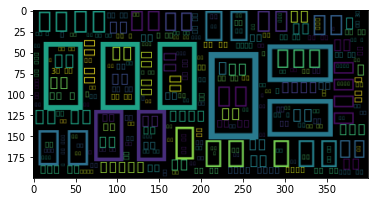

In [19]:
plt.figure()
plt.imshow(wordc, interpolation='bilinear') #한글 깨짐

In [20]:
wordc = WordCloud(background_color='white', max_words=300,
                 font_path='c:/Windows/Fonts/malgun.ttf',
                 relative_scaling=0.2)
wordc.generate(text)

(-0.5, 399.5, 199.5, -0.5)

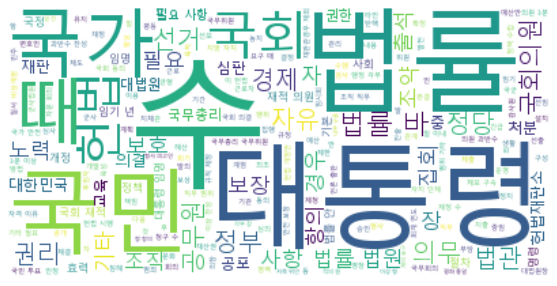

In [21]:
plt.figure(figsize=(10,5))
plt.imshow(wordc, interpolation='bilinear')
plt.axis('off') #축 제거

일반명사 출현 수: 2316
출현 일반명사 종류: 661
단어당 평균 출현 빈도: 3.503782148260212
<class 'list'>


(-0.5, 399.5, 199.5, -0.5)

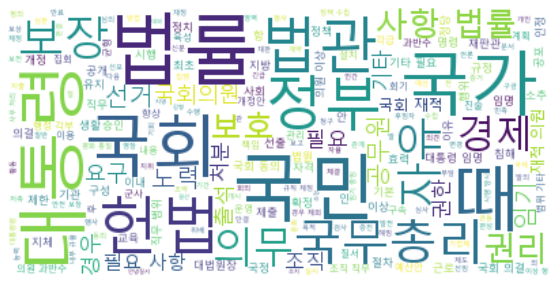

In [22]:
#일반 명사만 추출
tagged_data = komoran.pos(data)
nng_list = [t[0] for t in tagged_data if t[1]=='NNG']
print('일반명사 출현 수:', len(nng_list))
print('출현 일반명사 종류:', len(set(nng_list)))
print('단어당 평균 출현 빈도:', len(nng_list)/len(set(nng_list)))
print(type(nng_list))

#워드 클라우드 위한 형태 변경(리스트 -> 하나의 문장 형태)
nng_text = ' '.join(nng_list)

#워드 클라우드 작업
wordc = WordCloud(background_color='white',
                 max_words=300, #최대로 나올 수 있는 단어 수
                 font_path='c:/Windows/Fonts/malgun.ttf',
                 relative_scaling=0.2)
wordc.generate(nng_text)

#워드 클라우드 그리기
wordc.generate(nng_text)
plt.figure(figsize=(10,5))
plt.imshow(wordc, interpolation='bilinear')
plt.axis('off')

### 5.1 불용어 처리(불용어 사전 + 불용어 추가)
- 워드 클라우드 생성시 제외시킬 단어 지정

In [23]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from wordcloud import STOPWORDS
print(list(ENGLISH_STOP_WORDS)[:10]) #불용어 사전(영어)
print(list(STOPWORDS)[:10]) #불용어 사전(영어)

['eleven', 'thin', 'something', 'sometime', 'formerly', 'behind', 'hers', 'please', 'next', 'during']
['myself', "let's", "i'd", "shouldn't", "can't", 'yourself', "wasn't", 'all', 'www', 'hers']


In [24]:
#불용어 처리(불용어 사전+불용어 추가); 불용어 추가시에는 반드시 set()으로 추가해야함
불용어 = STOPWORDS | ENGLISH_STOP_WORDS | set(['대통령', '법관'])
#불용어 사전(영어)이 필요 없을 경우 아래와 같이 설정하는 것도 가능
불용어 = set(['대통령', '법관'])

(-0.5, 399.5, 199.5, -0.5)

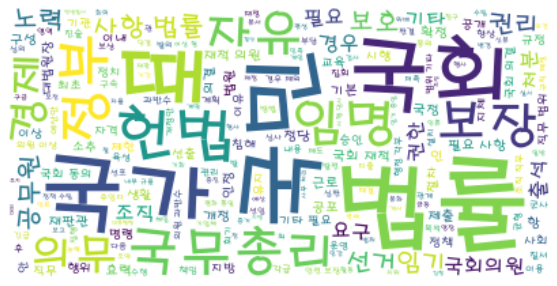

In [26]:
#워드 클라우드 작업
wordc = WordCloud(background_color='white',
                 max_words=300,
                 font_path='c:/Windows/Fonts/H2PORM.TTF',
                 relative_scaling=0.2,
                 stopwords=불용어) #워드 클라우드에서 불용어 제외시키기
wordc.generate(nng_text)

#워드 클라우드 그리기
wordc.generate(nng_text)
plt.figure(figsize=(10,5))
plt.imshow(wordc, interpolation='bilinear')
plt.axis('off')

### 5.2 마스킹
- 워드 클라우드를 지정된 마스크 이미지에 맞도록 처리

In [27]:
import os
os.getcwd() 

'C:\\Bigdata\\source\\9_자연어처리'

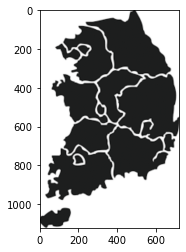

In [28]:
#마스킹; 워드 클라우드를 지정된 마스크 이미지에 맞도록 표시
from PIL import Image
import numpy as np
img = Image.open('data/south_korea.png').convert('RGBA')
#png 파일: 'RGBA'로 jpg 파일: 'RGB'로 convert
mask = Image.new('RGB', img.size, (0,0,0))
mask.paste(img)
plt.imshow(mask)
mask=np.array(mask) #넘파이 배열로 바꾸기

(-0.5, 719.5, 1123.5, -0.5)

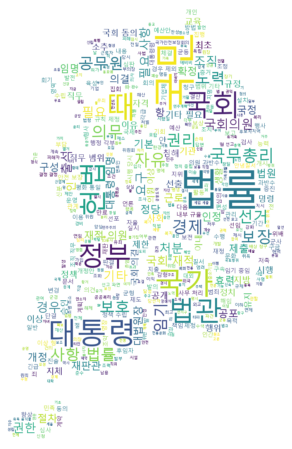

In [29]:
wordcloud = WordCloud(background_color='white',
                     max_words=500,
                     font_path='C:/Windows/Fonts/malgun.ttf',
                     relative_scaling=0.1,
                     mask=mask) #마스크 된 부분에만 글자 나오게
wordcloud.generate(nng_text)
plt.figure(figsize=(5,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [30]:
#워드 클라우드 저장
wordcloud.to_file('data/ch02_south_korea.png')

(-0.5, 899.5, 899.5, -0.5)

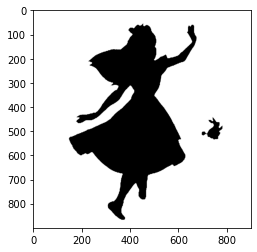

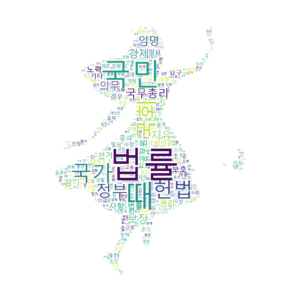

In [31]:
img = Image.open('data/test3.png').convert('RGBA')
mask = Image.new('RGB', img.size, (0,0,0))
mask.paste(img)
plt.imshow(mask)
mask = np.array(mask) #넘파이 배열로 바꾸기

wordcloud = WordCloud(background_color='white',
                     max_words=500,
                     font_path='C:Windows/Fonts/malgun.ttf',
                     relative_scaling=0.1,
                      stopwords = 불용어,
                      mask=mask)
wordcloud.generate(nng_text)
plt.figure(figsize=(5,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

## 6. 단어 빈도수 계산

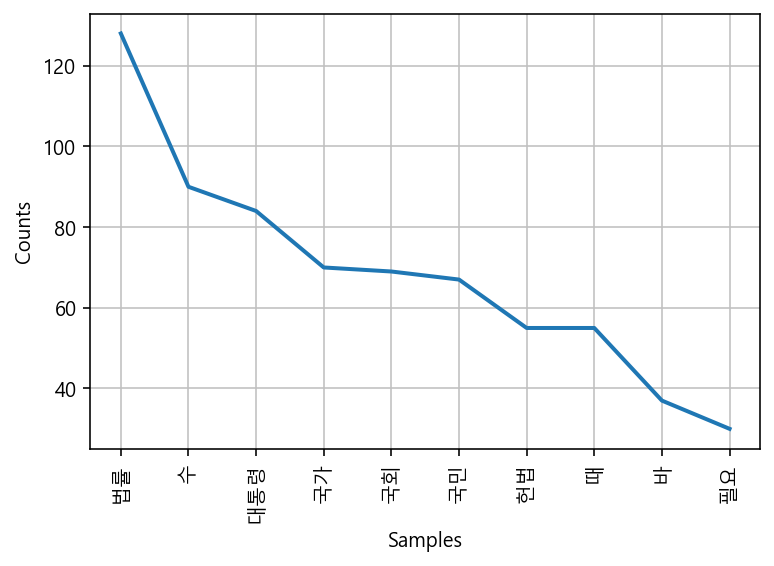

In [32]:
import nltk
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' #그래프 선명하게
plt.rc('font', family='Malgun Gothic') #한글 폰트 설정
word_list = komoran.nouns(data)
nltk.Text(word_list).plot(10)

## 7. 워드 임베딩(Word Embedding)
- 단어간 유사성 도출

In [33]:
#뉴스 기사 link들 list 가져오기 (RSS이용: https://fs.jtbc.joins.com//RSS/economy.xml)
import requests
from bs4 import BeautifulSoup
rss_url = 'https://fs.jtbc.joins.com//RSS/economy.xml'
jtbc_economy = requests.get(rss_url)
economy_soup = BeautifulSoup(jtbc_economy.content, 'xml')
link_list = economy_soup.select('item > link')
link_list = [link.text for link in link_list]
link_list

['https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997966',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997982',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997856',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997858',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997873',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997839',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997816',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997838',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997841',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997663',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997660',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997664',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB11997622',
 'https://news.jtbc.joins.com/article/article.aspx?news_id=NB119

In [36]:
#뉴스 기사들 명사들만 추출해서 워드 임베딩하기 편하게 만들기
from konlpy.tag import Kkma
kkma = Kkma()
news = []
for link in link_list:
    news_response = requests.get(link)
    news_soup = BeautifulSoup(news_response.content, 'html.parser')
    news_title = news_soup.select_one('h3#jtbcBody') #기사 제목
    news_content = news_soup.select_one('div#articlebody > div.article_content') #기사 내용 (div 생략 가능)
    content = news_title.text + ' ' + news_content.text
    news.append(kkma.nouns(content))

In [37]:
print(news[0])

['발', '발품경제', '품', '경제', '파', '파마', '마', '염색', '머리카락', '사수', '오해', '진실', '앵커', '국내', '탈모', '인구', '천만', '명', '전체', '국민', '5', '5명', '가운데', '1', '1명꼴', '꼴', '나이', '성별', '상관', '관련', '시장', '5조', '조', '원', '십', '년', '사이', '4', '4배', '배', '이상', '데', '두피', '관리', '치료법', '얘기', '분', '주찬', '기자', '체험', '지키기', '의', '하루', '100', '100개', '개', '모발', '힘', '이마', '느낌', '저', '황정욱', '모발이식', '이식', '전문의', '상태', '머리', '솜털', '진행', '얘기고요', '고요', '초기', '최근', '5년', '년', '동안', '병원', '환자', '43', '20', '30', '30대', '대', '절반', '절반가량', '가량', '여성', '층', '후천적', '스트레스', '과도', '다이어트', '영양', '부족', '등', '원인', '정도', '수', '아침', '저녁', '헤어', '헤어스타일', '스타일', '제품', '미세', '미세먼지', '먼지', '때문', '손가락', '끝', '마사지', '감고', '기구', '이용', '효과적', '두피관리사', '사', '노폐물', '제거', '오랫동안', '거품', '유지', '효과', '카페인', '호르몬', '기능성', '성분', '샴푸', '얼굴', '발의', '빗질', '요즘', '광고', '가정용', '레이', '저기', '식', '식약처', '약', '처', '의료', '의료기기', '기기', '인증', '모자', '영향', '유전', '진단', '의사', '처방', '부', '부작용', '작용', '두려움', '대부분', '경우', '성기능', '장애', '회복', '걱정', '치료', '시기', '방법', '

In [38]:
#리스트별 명사 개수
print([len(n) for n in news])

[228, 189, 160, 135, 113, 123, 209, 164, 156, 140, 97, 172, 141, 179, 122, 132, 38, 94, 134, 165]


In [39]:
#워드 임베딩하기
##아나콘다 prompt에서 conda install gensim 
##pip로 설치해서 넘파이에러 발생시 넘파이 패키지 삭제 후 다시 설치하기 (pip uninstall numpy ->  pip install numpy) 
from gensim.models import Word2Vec
model = Word2Vec(news, size=100, window=5, min_count=2, workers=-1) #min_count=num; num번 이상 나온 단어만

In [40]:
model.wv.most_similar('코로나')

[('마음', 0.27833276987075806),
 ('조선', 0.2734003961086273),
 ('홍제', 0.26200076937675476),
 ('12억', 0.24125918745994568),
 ('10', 0.23796068131923676),
 ('대체', 0.2206472009420395),
 ('윤', 0.21979959309101105),
 ('중', 0.21812057495117188),
 ('식품', 0.21403318643569946),
 ('시점', 0.21302714943885803)]

In [41]:
model.wv.most_similar('코로나', topn=5)

[('마음', 0.27833276987075806),
 ('조선', 0.2734003961086273),
 ('홍제', 0.26200076937675476),
 ('12억', 0.24125918745994568),
 ('10', 0.23796068131923676)]